### Treść zadania

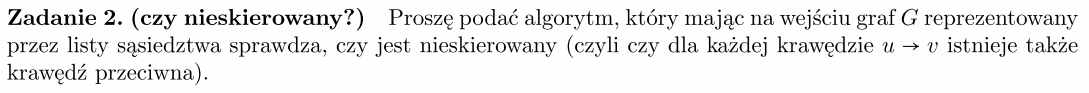

### Omówienie algorytmu

Tworzymy pomocniczą macierz, w której będziemy oznaczać krawędzie jako istniejące. Jeżeli, przechodząc przez listę sąsiadów danego wierzchołka $ u $, natrafimy na wierzchołek $ v $ taki, że nie istnieje krawędź w przeciwną stronę, czyli krawędź $ v - u $, będziemy powiększać licznik nieskierowanych krawędzi. Jeżeli natomiast natrafimy na krawędź, która już ma swój odpowiednik, prowadzący w przeciwną stronę, czyli w naszym przypadku $ v - u $, zmniejszymy licznik nieskierowanych krawędzi o 1. Po wykonaniu opisanych wcześniej kroków dla każdego wierzchołka grafu i jego sąsiadów, wystarczy sprawdzić, czy liczba skierowanych krawędzi wynosi 0 (graf jest nieskierowany), czy wynosi więcej niż 0 (skierowany).
###### UWAGA:
Ponieważ nie wiemy, czy graf ma krawędzie wielokrotne, w tablicy, w której zapisujemy to, czy istnieje krawędź z danego wierzchołka $ u $ do $ v $, możemy zamiast wartości boolowskiej, zapisywać liczbę krawędzi, które prowadzą w daną stronę (z $ u $ do $ v $). W tablicy od razu mamy zliczone liczby krawędzi, które łączą każdą parę wierzchołków w odpowiednim kierunku.

### Złożoność

###### Obliczeniowa:
$ O(V^2) $  - niestety stworzenie macierzy kwadratowej zajmuje tyle czasu,
###### Pamięciowa:
$ O(V^2) $  - pamięć potrzebna na macierz kwadratową

### Implementacja

In [1]:
def not_directed(G: 'graph representad by adjacency lists'):
    n = len(G)
    E = [[0] * n for _ in range(n)]
    
    directed_count = 0
    
    for u in range(n):
        for v in G[u]:
            E[u][v] += 1
            # If we added the new edge and a number of edges from u to v is
            # greater than the number of edges from v to u
            if E[u][v] > E[v][u]: directed_count += 1
            # Otherwise, we must have found an edge in the opposite direction
            # to the one which already exists so we will decrease a number of
            # directed edges
            else: directed_count -= 1
                
#     print(*E, sep='\n')
#     print(directed_count)
            
    return not directed_count

###### Kilka testów

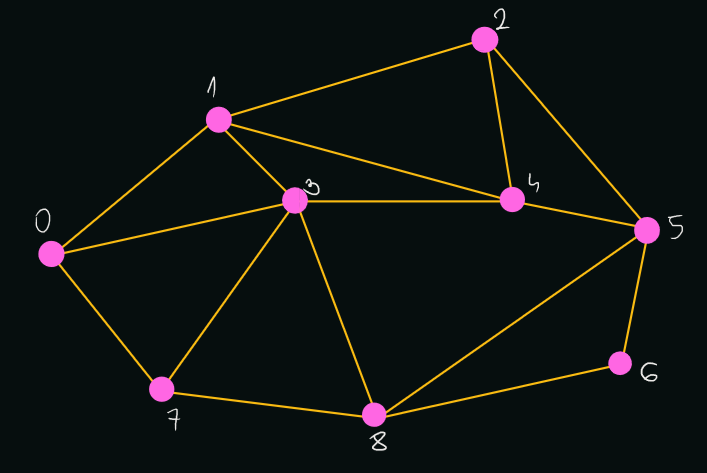

In [2]:
def undirected_graph_list(E: 'array of edges'):
    # Calculate a number of vertices
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    # Create a graph adjacency lists
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
        G[edge[1]].append(edge[0])
    return G

In [3]:
E = [(0, 1), (1, 2), (2, 5), (5, 6), (6, 8), (7, 8), (0, 7), (0, 3), (1, 3), (1, 4), (3, 4), (2, 4), 
     (4, 5), (7, 3), (3, 8), (8, 5)]
G = undirected_graph_list(E)
print(not_directed(G))

True


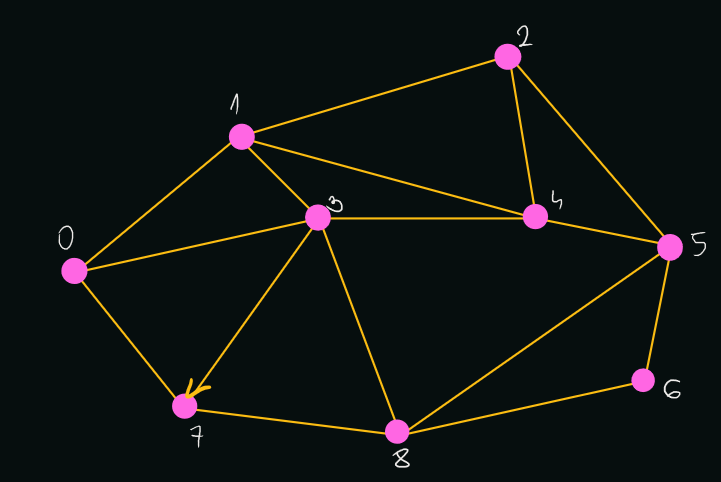

In [4]:
# Sprawdźmy, co uzyskamy po skierowaniu tylko jednej krawędzi
E = [(0, 1), (1, 2), (2, 5), (5, 6), (6, 8), (7, 8), (0, 7), (0, 3), (1, 3), (1, 4), (3, 4), (2, 4), 
     (4, 5), (7, 3), (3, 8), (8, 5)]
G = undirected_graph_list(E)
G[7].remove(3)
print(not_directed(G))

False


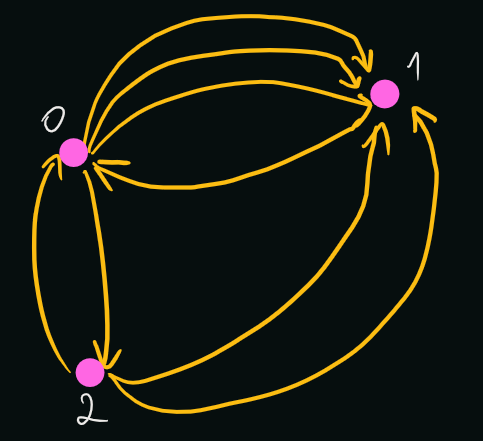

In [5]:
def directed_graph_list(E: 'array of edges'):
    # Calculate a number of vertices
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    # Create a graph adjacency lists
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
    return G

In [6]:
E = [(0, 1), (0, 1), (0, 1), (1, 0), (2, 1), (2, 1), (2, 0), (0, 2)]
G = directed_graph_list(E)
print(not_directed(G))

False
